<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

##  Table of Content

1. **[Univariate Analysis](#uni)**
2. **[Multivariate Analysis](#multi)**
3. **[Handle Non-Numeric Data](#cat)**
4. **[Normalization](#norm)**
5. **[Transformation Techniques](#trans)**

**Import the required libraries**

In [1]:
# import your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the health insurance dataset and check the first five observations

In [2]:
# import your code here
df=pd.read_csv(r'health_insurance.csv')
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

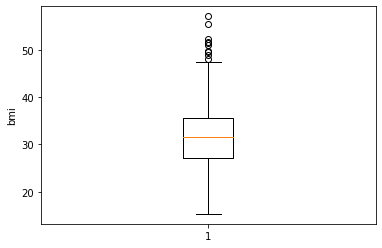

In [3]:
# import your code here
plt.boxplot(df['bmi'])
plt.ylabel('bmi')
plt.show()

* Yes the bmi column in given dataset has outliers which indicated in dark hallow cicles in above boxplot

In [4]:
bmi_mean=df['bmi'].mean()
bmi_std=df['bmi'].std()
a=df['bmi']
len(a[(a>bmi_mean-3*bmi_std) & (a>bmi_mean+3*bmi_std) ])

6

* There are 6 outliers in bmi column of given dataset accrding to 3 sigma rule

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# import your code here
df['age'].skew()

0.04359793424360781

* From the coefficient of skewness we can say that age column is positively skewd(right skewed)
if it is the case mean value should be greater than median 

In [6]:
df['age'].mean()>df['age'].median()

True

In [7]:
print(df['age'].mean(),df['age'].median())

42.28076923076923 42.0


lets see the skewness through distplot of seaborn

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


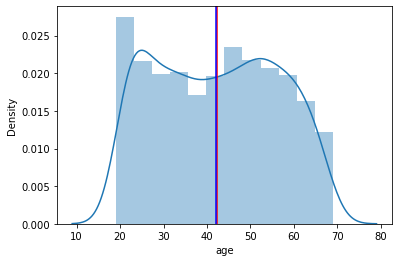

In [8]:
sns.distplot(df['age'])
plt.axvline(df['age'].mean(),color='red',label='Mean')
plt.axvline(df['age'].median(),color='b',label='Median')
plt.show()

The age column is very slighely right skewed one or near normal distribution

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

* This probability can be checked by dividing number of peoples having medical charge less than 25k by the total number of peoples

In [9]:
df.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')

In [10]:
# import your code here
len(df[df['medical_cost']<25000])/len(df[ 'medical_cost'])

0.8523076923076923

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


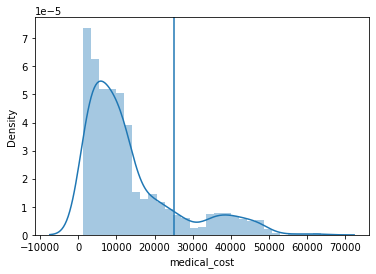

In [11]:
sns.distplot(df['medical_cost'])
plt.axvline(x=25000)

plt.show()


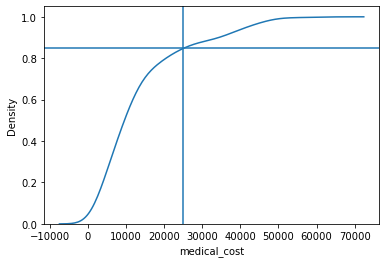

In [12]:
sns.kdeplot(df['medical_cost'],cumulative=True)
plt.axvline(x=25000)
plt.axhline(y=0.85)
plt.show()


* And the probability is 0.85  (85%)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


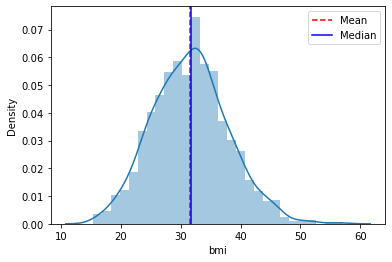

In [13]:
# import your code here
sns.distplot(df['bmi'])
plt.axvline(x=df['bmi'].mean(),label='Mean',color='r',linestyle='--')
plt.axvline(x=df['bmi'].median(),label='Median',color='b')
plt.legend()
plt.show()

* From the plot we can say that mean is slightly less than median so the bmi data is slightly left skewed data

In [14]:
df['bmi'].mode()[0]

32.3

In [15]:
df['bmi'].mode()[0]>df['bmi'].median()>df['bmi'].mean()

True

In [16]:
df['bmi'].skew()

0.2496769760401315

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


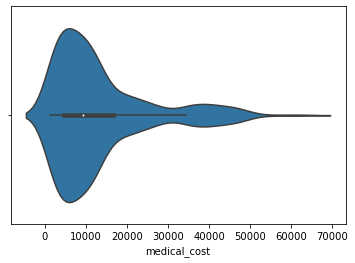

In [17]:
# import your code here
sns.violinplot(df['medical_cost'])
plt.show()

* From the violin plot we can say that medical_cost column is right skewed data
* medical_cost column have outliers

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# import your code here
df[(df.age<30 ) & (df.medical_cost>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


In [19]:
print('there are', len(df[(df.age<30 ) & (df.medical_cost>40000)]),'people whose age is less than 30 and whose medical cost is more than 40000')

there are 3 people whose age is less than 30 and whose medical cost is more than 40000


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

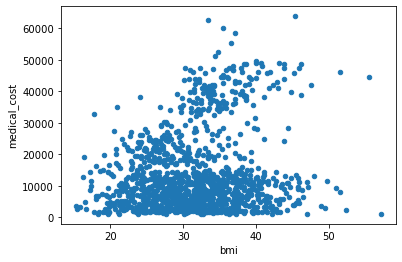

In [20]:
# import your code here
df.plot(kind='scatter',x='bmi',y='medical_cost')
plt.show()


* Ya some utliers are there with respect to BMI as well as medical_cost

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# import your code here
df.groupby(['gender'])['bmi'].std()/df.groupby(['gender'])['bmi'].mean()*100

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
# import your code here
df[df.gender=='M'].groupby('region')['gender'].agg(len).nlargest(1)

region
southeast    178
Name: gender, dtype: int64

* Southeast region has highest number of males

In [3]:
df.columns

Index(['age', 'gender', 'bmi', 'bp ', 'children', 'region', 'smoker',
       'medical_cost'],
      dtype='object')

In [30]:
pd.crosstab(df['gender'],df['region']).T.iloc[:,[1]]['M'].nlargest(1)

region
southeast    178
Name: M, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

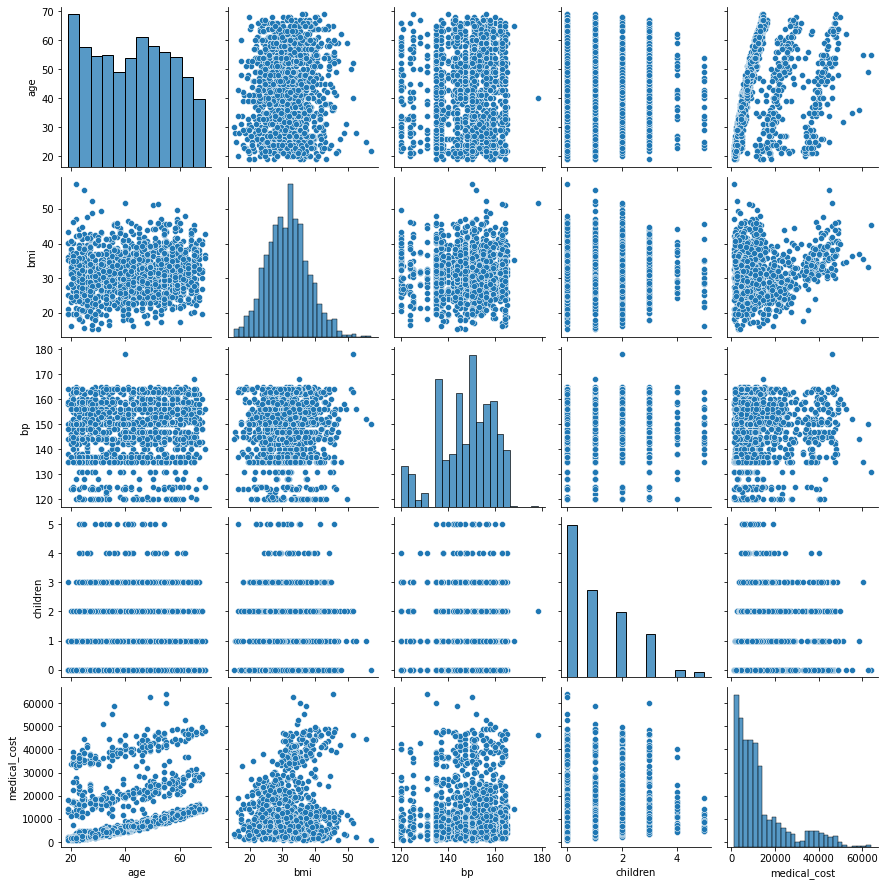

In [72]:
# import your code here
n_vars=[i for i in df.columns if df[i].dtype !='O']
n_vars
sns.pairplot(df[n_vars])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

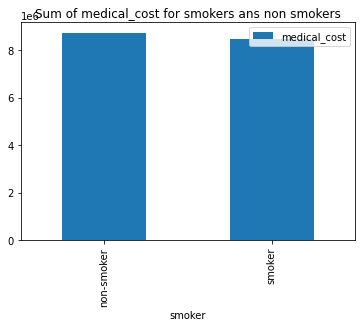

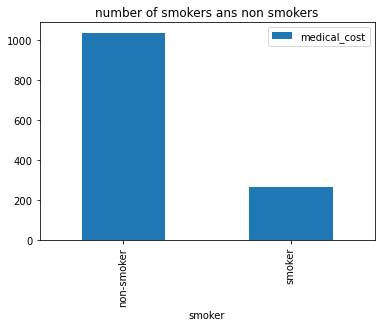

In [77]:
# import your code here
pd.pivot_table(data=df,index='smoker',values='medical_cost',aggfunc=np.sum).plot(kind='bar')
plt.title('Sum of medical_cost for smokers ans non smokers')
plt.show()
pd.pivot_table(data=df,index='smoker',values='medical_cost',aggfunc=len).plot(kind='bar')
plt.title('number of smokers ans non smokers')
plt.show()

* from the above two plots we can say that even though the number of smokers are less their medical cost is equivalent to non smokers total amount whose count is more as compared to smokers

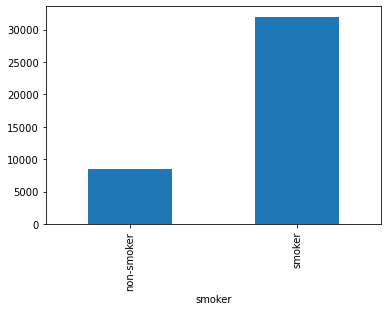

In [34]:
df.groupby('smoker')['medical_cost'].mean().plot(kind='bar')
plt.show()

* From above plot we can conclude that for smoker medical_cost is higher than non smokers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

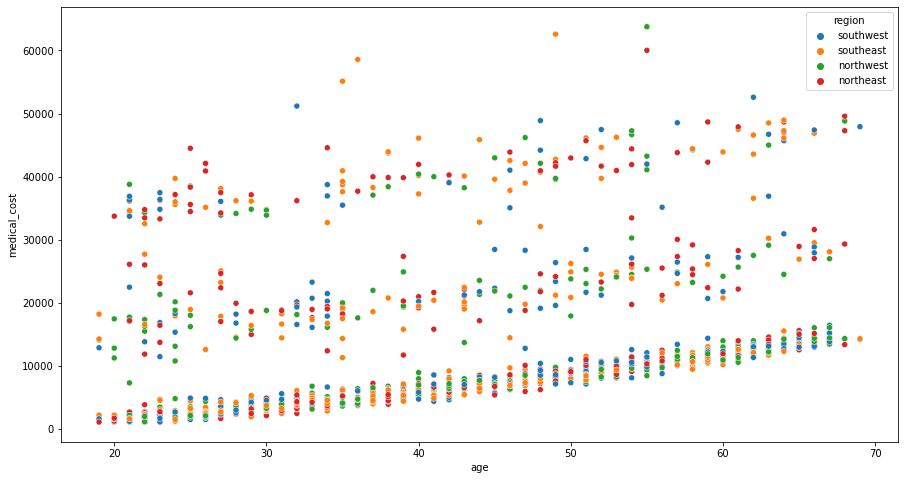

In [35]:
# import your code here
plt.figure(figsize=(15,8))

sns.scatterplot(x= df['age'],y=df['medical_cost'], hue = df['region'])
plt.show()

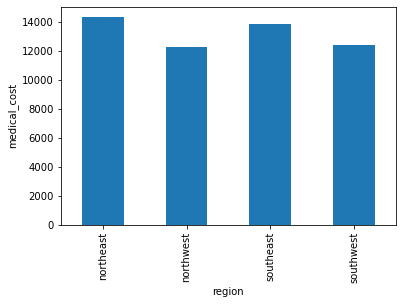

In [33]:
df.groupby('region')['medical_cost'].agg(np.mean).plot(kind='bar')
plt.ylabel('medical_cost')
plt.show()

In [36]:
import scipy.stats

In [38]:
northeast=df[df.region=='northeast']['medical_cost']
northwest=df[df.region=='northwest']['medical_cost']
southeast=df[df.region=='southeast']['medical_cost']
southwest=df[df.region=='southwest']['medical_cost']

In [39]:
scipy.stats.f_oneway(northeast,northwest,southeast,southwest)

F_onewayResult(statistic=2.289981100013349, pvalue=0.07668484183098068)

p_value is more than 0.05 so there is no significant difference between medical cost among different regions

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [78]:
# import your code here
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1295,0,0,0,1
1296,1,0,0,0
1297,0,0,1,0
1298,0,1,0,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [84]:
df['smoker'].unique()

array(['smoker', 'non-smoker'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
# import your code here
df['Smoker_label']=LabelEncoder().fit_transform(df['smoker'])

In [43]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,Smoker_label
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
# import your code here
df['Gender_freq']=df['gender'].replace(dict(df['gender'].value_counts()))
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,Gender_freq
0,23,M,31.900,157,0,southwest,smoker,16884.92400,643
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,657
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,657
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,657
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,657


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# import your code here
a=pd.Series(df['smoker'].replace({'smoker':1,'non-smoker':0}),name='smoker_label')
a
b=df['smoker']
pd.concat([b,a],axis=1)

,smoker,smoker_label
0,smoker,1
1,non-smoker,0
2,non-smoker,0
3,non-smoker,0
4,non-smoker,0
...,...,...
1295,non-smoker,0
1296,non-smoker,0
1297,non-smoker,0
1298,non-smoker,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
# import your code here
from sklearn.preprocessing import StandardScaler

In [43]:
scale=StandardScaler()
df['scaled_bmi']=scale.fit_transform(df['bmi'].values.reshape(-1,1))

In [44]:
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost,Gender_freq,scaled_bmi
0,23,M,31.900,157,0,southwest,smoker,16884.92400,643,0.050142
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,657,0.816583
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,657,0.538020
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,657,-1.239588
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,657,-0.582526


C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


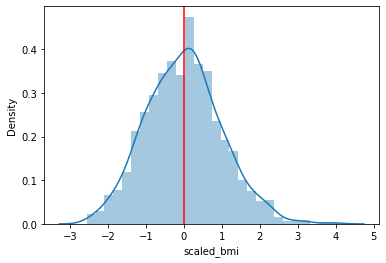

In [45]:
sns.distplot(df['scaled_bmi'])
plt.axvline(x=df['scaled_bmi'].mean(),color='r')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [46]:
# import your code here
print('the range of age column is :',df['age'].max()-df['age'].min() )

the range of age column is : 50


* In order to convert the range of age column to one we need to do minmax sclaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
df['mm_scae_age']=MinMaxScaler().fit_transform(df['age'].values.reshape(-1,1))

In [49]:
print('the range of age column is :',df['mm_scae_age'].max()-df['mm_scae_age'].min() )

the range of age column is : 1.0


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


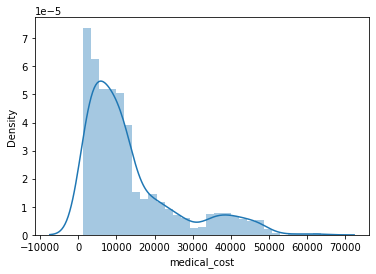

In [50]:
# import your code here
sns.distplot(df['medical_cost'])
plt.show()

* It is right skewed data

In [51]:
df['log_tranformed_m_cost']=np.log(df['medical_cost'])

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


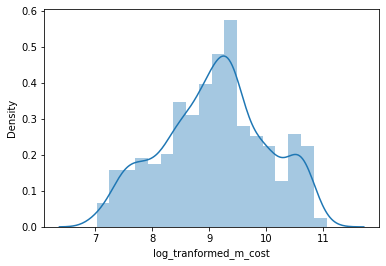

In [52]:
sns.distplot(df['log_tranformed_m_cost'])
plt.show()

* Now the skewness is reduces as compare to original one

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3_new\envs\mtechproject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


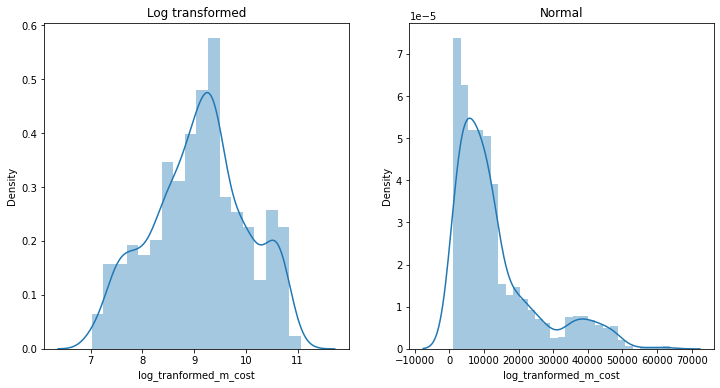

In [64]:
# import your code here

fig,ax=plt.subplots(1,2)
fig.set_size_inches(12,6)
sns.distplot(np.exp(df['log_tranformed_m_cost']),ax=ax[1])
ax[1].set_title('Normal')
sns.distplot(df['log_tranformed_m_cost'],ax=ax[0])
ax[0].set_title('Log transformed')
plt.show()